In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn import tree
from sklearn import preprocessing

In [2]:
df=pd.read_csv("titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
inputs=df.drop(["PassengerId","Survived","Name","SibSp","Parch","Ticket","Cabin","Embarked"],axis="columns")

In [5]:
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [6]:
target=df["Survived"]

In [7]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [8]:
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [9]:
le=preprocessing.LabelEncoder()

In [10]:
inputs["sex_n"]=le.fit_transform(inputs["Sex"])

In [11]:
inputs

,Pclass,Sex,Age,Fare,sex_n
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1
...,...,...,...,...,...
886,2,male,27.0,13.0000,1
887,1,female,19.0,30.0000,0
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [12]:
inputs_n=inputs.drop(["Sex"],axis="columns")
inputs_n

,Pclass,Age,Fare,sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [20]:
inputs_n

,Pclass,Age,Fare,sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [24]:
inputs_n.Age=inputs_n.Age.fillna(inputs_n.Age.mean())

In [25]:
inputs_n

,Pclass,Age,Fare,sex_n
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [27]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(inputs_n,target,train_size=0.8)

In [28]:
x_train

,Pclass,Age,Fare,sex_n
387,2,36.000000,13.0000,0
64,1,29.699118,27.7208,1
267,3,25.000000,7.7750,1
843,3,34.500000,6.4375,1
165,3,9.000000,20.5250,1
...,...,...,...,...
131,3,20.000000,7.0500,1
86,3,16.000000,34.3750,1
274,3,29.699118,7.7500,0
700,1,18.000000,227.5250,0


In [29]:
x_test

,Pclass,Age,Fare,sex_n
554,3,22.000000,7.7750,0
528,3,39.000000,7.9250,1
351,1,29.699118,35.0000,1
661,3,40.000000,7.2250,1
884,3,25.000000,7.0500,1
...,...,...,...,...
399,2,28.000000,12.6500,0
161,2,40.000000,15.7500,0
827,2,1.000000,37.0042,1
701,1,35.000000,26.2875,1


In [30]:
y_train

387    1
64     0
267    1
843    0
165    1
      ..
131    0
86     0
274    1
700    1
864    0
Name: Survived, Length: 712, dtype: int64

In [31]:
y_test

554    1
528    0
351    0
661    0
884    0
      ..
399    1
161    1
827    1
701    1
849    1
Name: Survived, Length: 179, dtype: int64

In [32]:
model=tree.DecisionTreeClassifier()

In [33]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
model.predict(x_test)

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [37]:
y_test

554    1
528    0
351    0
661    0
884    0
      ..
399    1
161    1
827    1
701    1
849    1
Name: Survived, Length: 179, dtype: int64

In [38]:
model.score(x_test,y_test)

0.7988826815642458

In [39]:
classifier=tree.DecisionTreeClassifier()

[Text(0.3404020357302867, 0.98, 'x[3] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.1664986559139785, 0.94, 'x[0] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(0.05913978494623656, 0.9, 'x[1] <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(0.03942652329749104, 0.86, 'x[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.03225806451612903, 0.82, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.04659498207885305, 0.82, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07885304659498207, 0.86, 'x[2] <= 28.856\ngini = 0.091\nsamples = 168\nvalue = [8, 160]'),
 Text(0.06093189964157706, 0.82, 'x[2] <= 28.231\ngini = 0.182\nsamples = 69\nvalue = [7, 62]'),
 Text(0.053763440860215055, 0.78, 'x[1] <= 56.0\ngini = 0.161\nsamples = 68\nvalue = [6, 62]'),
 Text(0.03942652329749104, 0.74, 'x[1] <= 23.5\ngini = 0.14\nsamples = 66\nvalue = [5, 61]'),
 Text(0.03225806451612903, 0.7, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(

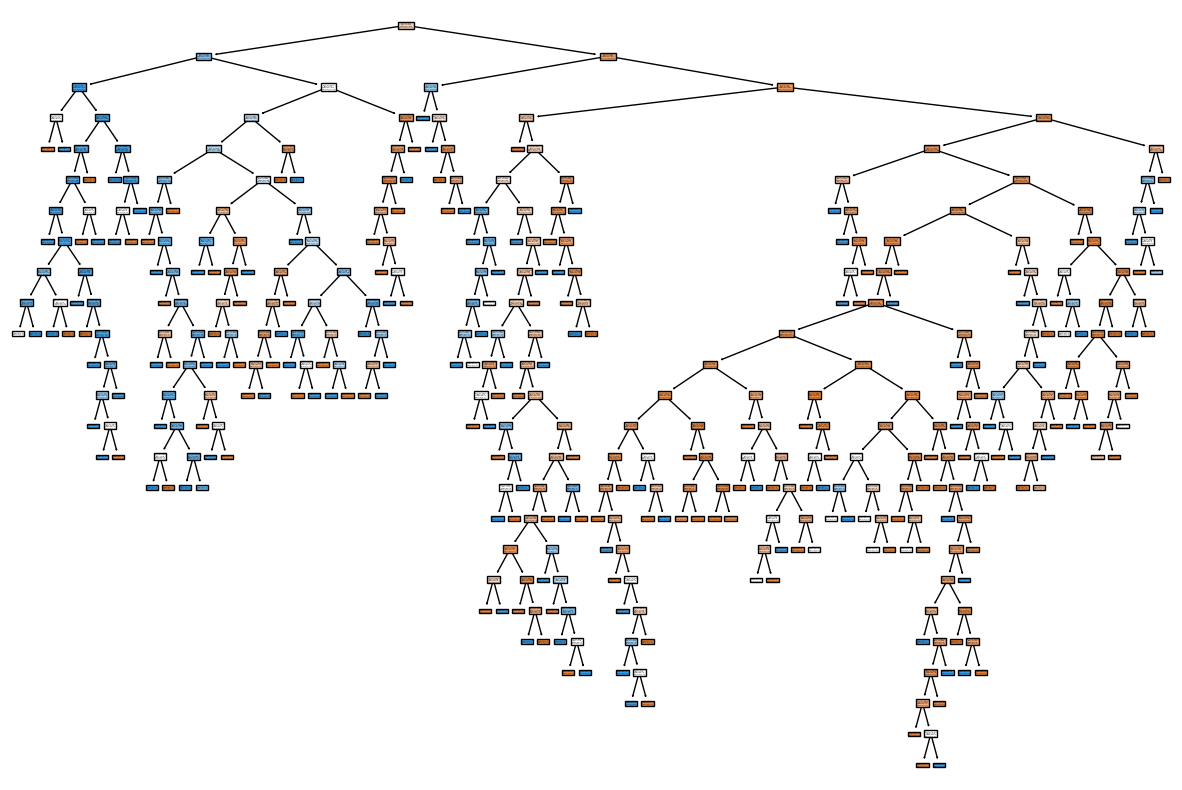

In [44]:
classifier.fit(inputs_n,target)
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)